Para la imagen suministrada “metal grid”. Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con color las direcciones de gradientes más altos

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

Se aplica detector de bordes de Canny

In [2]:
imagen = cv.imread('metalgrid.jpg')
gray = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)

Reducción de ruido

In [3]:
GBlur = cv.GaussianBlur(gray,(7,7),0)

Gradiente de intensidad de la imagen

In [4]:
# Orientación x
Sobelx64 = cv.Sobel(GBlur,cv.CV_32F,1,0,ksize=5) 
Absolutex = np.absolute(Sobelx64)
Sobelx_u1 = (Absolutex/Absolutex.max())*255
Sobelx = np.uint8(Sobelx_u1)

#Sobely
Sobely64 = cv.Sobel(GBlur,cv.CV_32F,0,1,ksize=5) 
Absolutey = np.absolute(Sobely64)
Sobely_u1 = (Absolutey/Absolutey.max())*255
Sobely= np.uint8(Sobely_u1)

Magnitud

In [5]:
magnitud = np.hypot(Sobelx, Sobely)
magnitud = (magnitud/magnitud.max())*255
magnitud = np.uint8(magnitud)

Dirección

In [6]:
tita = np.arctan2(Sobely64, Sobelx64)
angulo = np.rad2deg(tita)

Supresión de no máximos

In [7]:
print("Magnitud máxima: ", magnitud.max())
print("Magnitud mínima: ", magnitud.min())

Magnitud máxima:  255
Magnitud mínima:  0


In [8]:
columnas = np.argwhere((magnitud >= 240) & (magnitud <= 255))  

Miremos las imágenes:

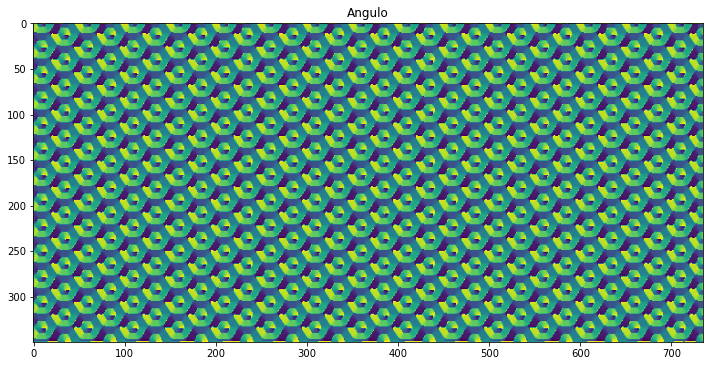

In [18]:
figura = plt.figure(figsize = (12,12))
plt.title('Angulo')
plt.imshow(angulo)
#cv.imshow("Angulo",angulo)
#cv.waitKey(0)
#cv.destroyAllWindows()

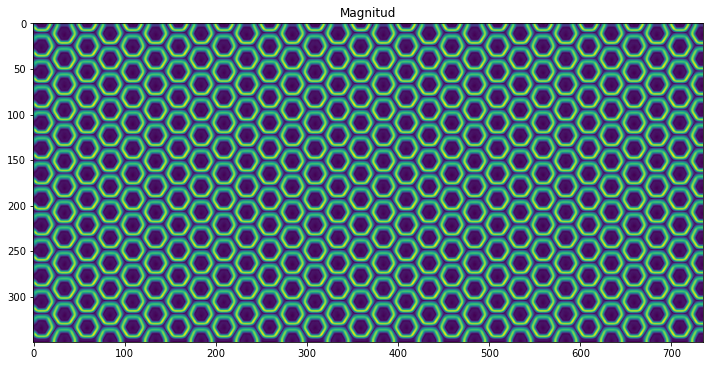

In [17]:
figura = plt.figure(figsize = (12,12))
plt.title('Magnitud')
plt.imshow(magnitud)
#cv.imshow("Magnitud",magnitud)
#cv.waitKey(0)
#cv.destroyAllWindows()

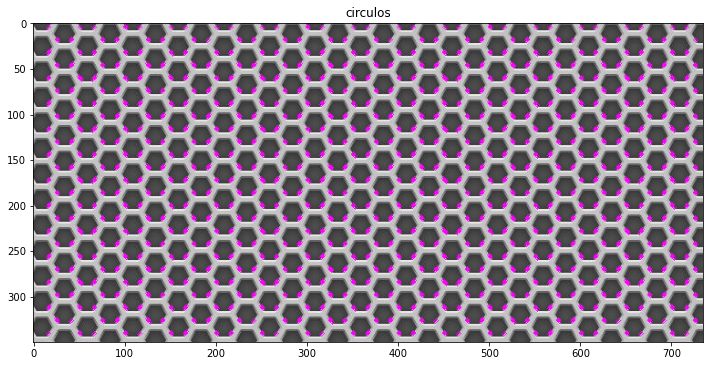

In [16]:
for a in columnas:
    cv.circle(imagen,(a[1],a[0]),2,(255,0,255),1)
figura = plt.figure(figsize = (12,12))
plt.title('circulos')
plt.imshow(imagen)
#cv.imshow('circulos',imagen)
#cv.waitKey(0)
#cv.destroyAllWindows()